In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv

In [2]:
df_1= pd.read_csv('coinbase_Part1.csv')
df_1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [3]:
df_2 = pd.read_csv('coinbase_Part2.csv')
df_2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1480913100,758.00,758.11,758.00,758.11,5.08115,3852.061200,758.108145
1,1480913160,758.12,758.20,758.12,758.13,5.76837,4373.355968,758.161485
2,1480913220,758.18,758.18,758.00,758.18,2.20489,1671.407708,758.045847
3,1480913280,758.08,758.08,758.08,758.08,2.44986,1857.189869,758.080000
4,1480913340,758.19,758.20,758.19,758.20,1.39213,1055.512856,758.199921


In [4]:
frames = [df_1, df_2]
df = pd.concat(frames, ignore_index=True)
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1819070,1530057360,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990
1819071,1530057420,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687
1819072,1530057480,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515
1819073,1530057540,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271
1819074,1530057600,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960


In [5]:
# change time zone to UTC -0
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC')
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1819070,2018-06-26 23:56:00+00:00,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990
1819071,2018-06-26 23:57:00+00:00,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687
1819072,2018-06-26 23:58:00+00:00,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515
1819073,2018-06-26 23:59:00+00:00,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271
1819074,2018-06-27 00:00:00+00:00,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960


In [6]:
#Convert Timestamp into separate Date and Time
#temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects

df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
1819070,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990,2018-06-26,23:56:00+00:00
1819071,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687,2018-06-26,23:57:00+00:00
1819072,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515,2018-06-26,23:58:00+00:00
1819073,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271,2018-06-26,23:59:00+00:00
1819074,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960,2018-06-27,00:00:00+00:00


In [7]:
price=df['Close']

In [8]:
# calculate rolling average and standard deviation in one day period

min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1819070,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990,2018-06-26,23:56:00+00:00,6950.466007,116102.541286,558.598612
1819071,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687,2018-06-26,23:57:00+00:00,6950.436759,116105.160854,558.611216
1819072,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515,2018-06-26,23:58:00+00:00,6950.407581,116107.757433,558.623708
1819073,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271,2018-06-26,23:59:00+00:00,6950.378122,116110.388868,558.636369
1819074,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960,2018-06-27,00:00:00+00:00,6950.348583,116113.035307,558.649102


In [9]:
# select study dates range
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('01/23/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]

df_3= df.loc[index_1:index_2]

df_3.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1595874,10766.70,10799.98,10766.69,10799.98,25.238525,272069.775340,10779.939584,2018-01-23,00:00:00+00:00,13869.981494,326687.939985,1571.778084
1595875,10799.98,10800.00,10797.23,10797.23,6.726254,72636.527088,10798.957083,2018-01-23,00:01:00+00:00,13869.883282,326700.295011,1571.837527
1595876,10797.24,10797.24,10789.00,10790.00,10.324661,111401.734660,10789.868923,2018-01-23,00:02:00+00:00,13869.784737,326712.690754,1571.897166
1595877,10790.00,10790.00,10725.78,10732.90,35.167564,378147.511530,10752.735519,2018-01-23,00:03:00+00:00,13869.684748,326725.608784,1571.959318
1595878,10732.90,10750.00,10732.90,10750.00,8.819049,94776.923925,10746.841536,2018-01-23,00:04:00+00:00,13869.587158,326738.663170,1572.022126


In [10]:
df_4=df_3.groupby(df_3.Date).mean()
df_4.head()



,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2018-01-23,10694.957153,10707.347083,10682.436090,10694.852736,15.001166,160812.535684,10694.836727,13808.057214,337446.018425,1623.537913
2018-01-24,10971.984729,10980.105139,10963.683576,10972.448472,10.366352,113846.298097,10971.714961,13699.514545,355122.398070,1708.583434
2018-01-25,11259.428354,11265.764250,11252.426514,11259.235854,9.321376,105256.012808,11259.205322,13584.255872,364361.017716,1753.032764
2018-01-26,10992.639417,10999.507153,10985.075500,10992.569951,12.927589,141304.100192,10992.283702,13430.223722,365297.124620,1757.536610
2018-01-27,11177.254542,11182.093500,11172.314326,11177.383819,8.325551,93366.121547,11177.335040,13299.159649,370485.506037,1782.499222


In [11]:
marker=[]
avechange=[0]
sdchange=[]
for i in range(len(df_4)-1):
    avediff=(df_4['Average'].iloc[i+1]-df_4['Average'].iloc[i])/df_4['Average'].iloc[i]*100
    sddiff=(df_4['SD'].iloc[i+1]-df_4['SD'].iloc[i])/df_4['SD'].iloc[i]
    avechange.append(avediff)
    sdchange.append(sddiff)
   # if abs(avechange[i]) > 2*(df_4['SD'].iloc[i]):
    if abs(avechange[i]) > 2*(sdchange[i]):
        marker.append(df_4.index[i])
df_4['avechange']=avechange
df_4

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,avechange
Date,,,,,,,,,,,
2018-01-23,10694.957153,10707.347083,10682.436090,10694.852736,15.001166,160812.535684,10694.836727,13808.057214,337446.018425,1623.537913,0.000000
2018-01-24,10971.984729,10980.105139,10963.683576,10972.448472,10.366352,113846.298097,10971.714961,13699.514545,355122.398070,1708.583434,-0.786082
2018-01-25,11259.428354,11265.764250,11252.426514,11259.235854,9.321376,105256.012808,11259.205322,13584.255872,364361.017716,1753.032764,-0.841334
2018-01-26,10992.639417,10999.507153,10985.075500,10992.569951,12.927589,141304.100192,10992.283702,13430.223722,365297.124620,1757.536610,-1.133902
2018-01-27,11177.254542,11182.093500,11172.314326,11177.383819,8.325551,93366.121547,11177.335040,13299.159649,370485.506037,1782.499222,-0.975889
2018-01-28,11425.907035,11430.281958,11422.407681,11426.112271,9.252465,105956.501345,11426.139665,13198.271418,375054.817538,1804.483332,-0.758606
2018-01-29,11137.583674,11140.958229,11133.652896,11137.279299,7.619312,84888.235432,11137.324422,13102.589609,379154.300212,1824.206977,-0.724957
2018-01-30,10621.101118,10627.480681,10613.562326,10620.313118,18.900901,194549.235567,10620.605888,13025.871604,387245.629262,1863.136402,-0.585518
2018-01-31,9978.939889,9986.435667,9970.953299,9978.950660,13.351993,132254.567681,9978.619754,12914.256311,400836.959836,1928.527722,-0.856874


In [12]:
len(df_4)

64

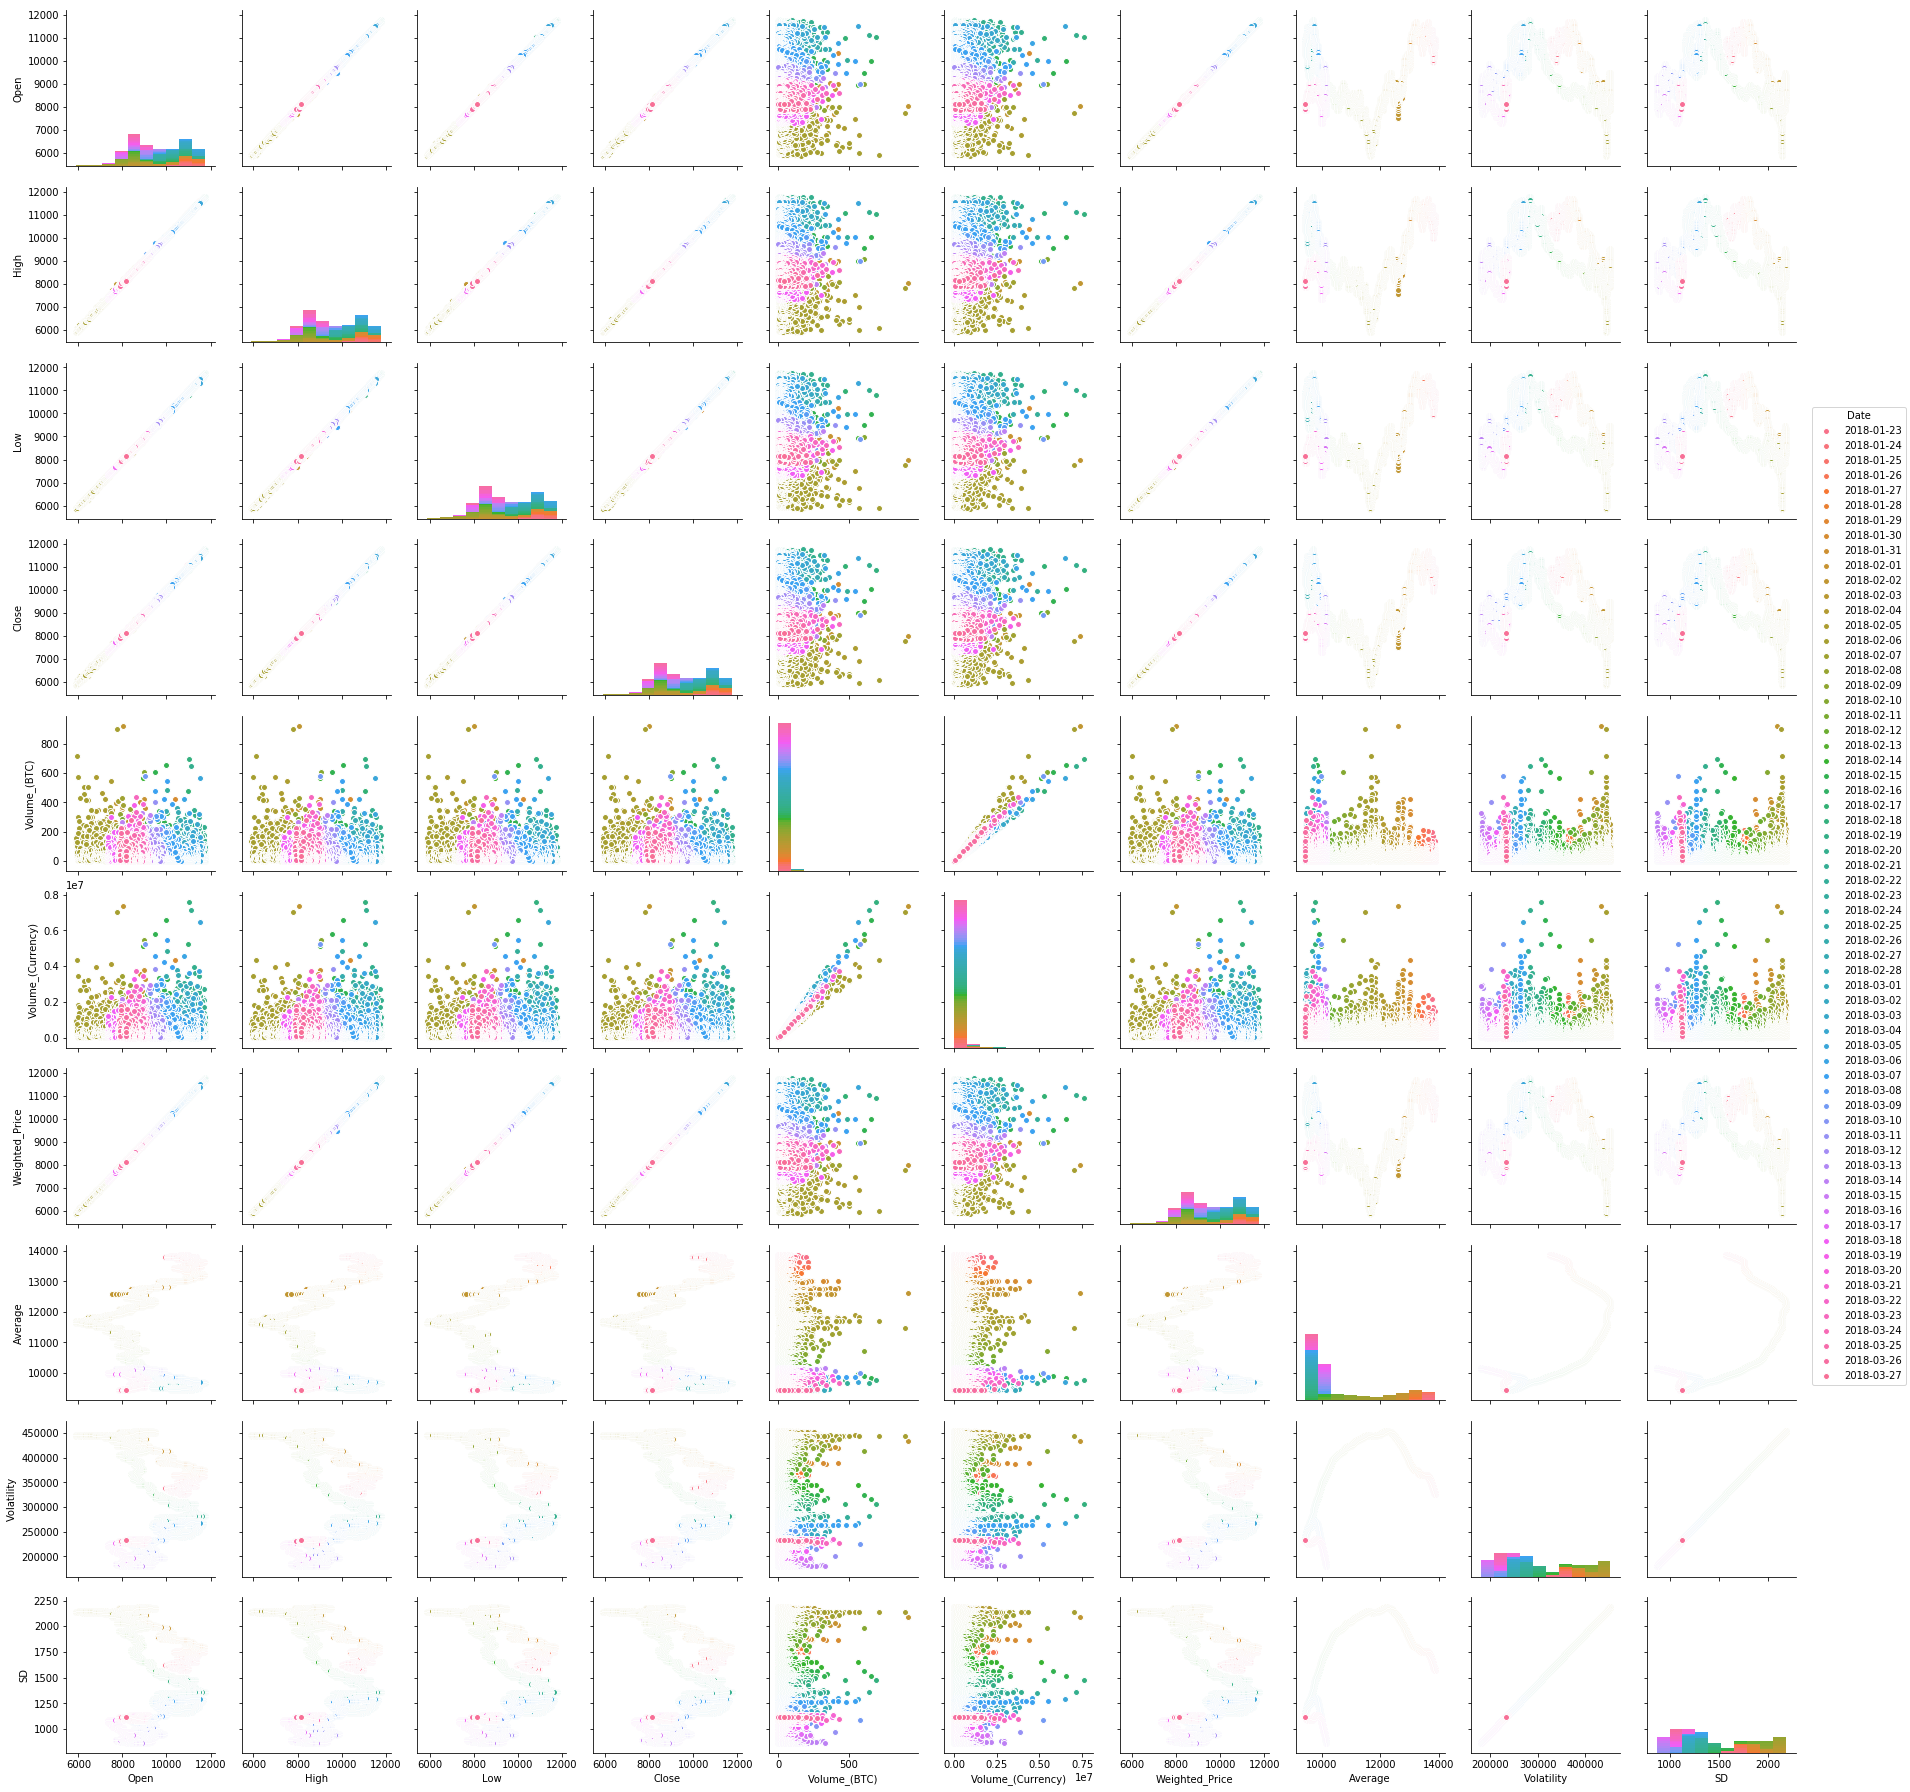

In [13]:
import seaborn as sns
sns.pairplot(df_3,hue='Date',size=2.5)

(array([736719., 736726., 736733., 736740., 736747., 736754., 736761.,
        736768., 736775., 736782.]), <a list of 10 Text xticklabel objects>)

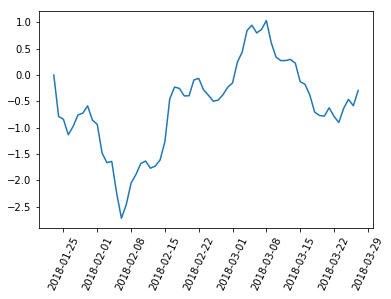

In [14]:
plt.plot(df_4.index,df_4.avechange)
plt.xticks(rotation=65)

In [15]:
#find pearson correlation of the different features regarding price change, calculates correlation and p-value
import scipy
from scipy.stats import pearsonr
p_correlation=[]
for i in range(10):
    p_i=pearsonr(df_4.iloc[:,i],df_4.iloc[:,10])
    p_correlation.append(p_i)
p_correlation

[(0.5158806099604915, 1.2838394943558483e-05),
 (0.5149744028418026, 1.3375988735159327e-05),
 (0.5167071386173441, 1.2365666154664269e-05),
 (0.5157691864260496, 1.2903393955998967e-05),
 (-0.4257869160936092, 0.00045199600204116235),
 (-0.31731478114848016, 0.010622310643741213),
 (0.5158653287579223, 1.2847291184715555e-05),
 (-0.4019751315510315, 0.0009930571904048508),
 (-0.7541028338451256, 6.318599584176673e-13),
 (-0.7541028338451259, 6.318599584176442e-13)]